## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input,Conv2D,UpSampling2D,MaxPooling2D
from tensorflow.keras.datasets import mnist

## Check GPU

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9618116927910668097
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1738696295
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3913298050167088334
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


## Load Dataset

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## Explore Dataset

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
i = np.random.randint(0,60000)

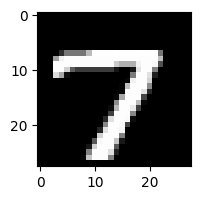

The digit is : 7


In [7]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[i],cmap='gray')
plt.show()
print(f'The digit is : {y_train[i]}')

## Scaling

In [8]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [9]:
x_train = x_train.astype('float64')/255.0

In [10]:
x_test = x_test.astype('float64')/255.0

## Flatten the images for fully connected layer

In [11]:
x_train = x_train.reshape(x_train.shape[0],np.prod(x_train.shape[1:]))

In [12]:
x_train.shape

(60000, 784)

In [13]:
x_test = x_test.reshape(x_test.shape[0],np.prod(x_test.shape[1:]))

In [14]:
x_test.shape

(10000, 784)

## Vanilla Autoencoder

## Create Network
**3 Layers (input->encode->decode->output)**

In [15]:
input_size = 784
output_size = 784
hidden_size = 64

In [16]:
input_ = Input(shape=input_size)
hidden = Dense(units=hidden_size,activation="relu")(input_)
output = Dense(units=output_size,activation='sigmoid')(hidden)

## Autoencoder

In [17]:
autoencoder = Model(inputs=input_,outputs=output)

In [18]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


## Encoder

In [19]:
encoder = Model(input_,hidden)

In [20]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


## Decoder

In [21]:
decoder_input = Input(shape=(hidden_size,))

In [22]:
decoder_layer = autoencoder.layers[-1]

In [23]:
decoder = Model(decoder_input,decoder_layer(decoder_input))

In [24]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


## Train Autoencoder

In [25]:
autoencoder.compile(optimizer='adam',loss='mse')

In [26]:
history = autoencoder.fit(x_train,x_train,batch_size=128,epochs=100,verbose=1,validation_data=(x_test,x_test))

Epoch 1/100
469/469 [==============================] - 2s 2ms/step - loss: 0.0451 - val_loss: 0.0227
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0175 - val_loss: 0.0130
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0110 - val_loss: 0.0089
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0079 - val_loss: 0.0067
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0063 - val_loss: 0.0056
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 8/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 9/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 10/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0043 - val_lo

469/469 [==============================] - 1s 3ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 82/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 83/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 84/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 85/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 86/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 87/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 88/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 89/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 90/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 

## Predict & Visualize

In [27]:
i = np.random.randint(0,10000)

In [28]:
encoded_images_ = encoder.predict(x_test)

313/313 [==============================] - 0s 720us/step


The digit is 4


Text(0.5, 1.0, 'Encoded Image')

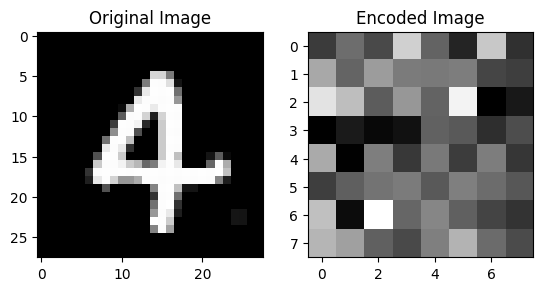

In [29]:
print(f'The digit is {y_test[i]}')
plt.subplot(1,2,1)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(encoded_images_[i].reshape(8,8),cmap='gray')
plt.title('Encoded Image')

In [30]:
decoded_images_ = decoder.predict(encoded_images_)

313/313 [==============================] - 0s 603us/step


The digit is 4


Text(0.5, 1.0, 'Decoded Image')

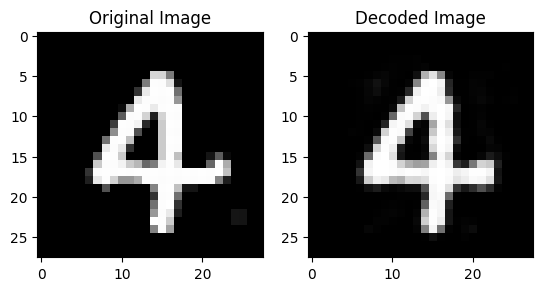

In [31]:
print(f'The digit is {y_test[i]}')
plt.subplot(1,2,1)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(decoded_images_[i].reshape(28,28),cmap='gray')
plt.title('Decoded Image')

In [32]:
decoded_images = autoencoder.predict(x_test)

313/313 [==============================] - 0s 838us/step


The digit is 4


Text(0.5, 1.0, 'Autoencoded Image')

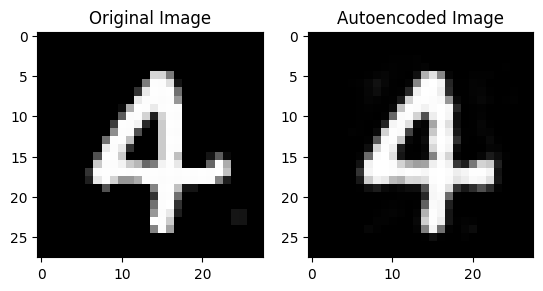

In [33]:
print(f'The digit is {y_test[i]}')
plt.subplot(1,2,1)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(decoded_images[i].reshape(28,28),cmap='gray')
plt.title('Autoencoded Image')

## Create Network
**Input->encoder_layer_1->encoder_layer_2->latent->decoder_layer_1->decoder_layer_2->Output**

In [34]:
input_size = 784
layer_1_size = 256
layer_2_size = 128
latent_size = 64

In [35]:
input_img = Input(shape=input_size)
e1 = Dense(units=layer_1_size,activation="relu")(input_img)
e2 = Dense(units=layer_2_size,activation="relu")(e1)
l = Dense(units=latent_size,activation="relu")(e2)
d1 = Dense(units=layer_2_size,activation="relu")(l)
d2 = Dense(units=layer_1_size,activation="relu")(d1)
output_img = Dense(units=input_size,activation="sigmoid")(d2)

## Multilayer Autoencoder

In [36]:
multilayer_autoencoder = Model(inputs=input_img,outputs=output_img)

In [37]:
multilayer_autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 784)               2014

## Multilayer Encoder

In [38]:
multilayer_encoder = Model(input_img,l)

In [39]:
multilayer_encoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
Total params: 242,112
Trainable params: 242,112
Non-trainable params: 0
_________________________________________________________________


## Multilayer_Decoder

In [40]:
decoder_img = Input(shape=latent_size)
decoder_layer_1 = multilayer_autoencoder.layers[-3](decoder_img)
decoder_layer_2 = multilayer_autoencoder.layers[-2](decoder_layer_1)
decoder_output = multilayer_autoencoder.layers[-1](decoder_layer_2)

In [41]:
multilayer_decoder = Model(inputs=decoder_img,outputs=decoder_output)

In [42]:
multilayer_decoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 784)               201488    
                                                                 
Total params: 242,832
Trainable params: 242,832
Non-trainable params: 0
_________________________________________________________________


## Train Multilayer Autoencoder

In [43]:
multilayer_autoencoder.compile(optimizer='adam',loss='mse')

In [44]:
history_1 = multilayer_autoencoder.fit(x_train,x_train,batch_size=128,epochs=100,verbose=1,validation_data=(x_test,x_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0384 - val_loss: 0.0186
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0157 - val_loss: 0.0131
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0122 - val_loss: 0.0110
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0094 - val_loss: 0.0087
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0085 - val_loss: 0.0079
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0079 - val_loss: 0.0073
Epoch 8/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0074 - val_loss: 0.0071
Epoch 9/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 10/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0065 - val_lo

469/469 [==============================] - 2s 3ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 82/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 83/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 84/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 85/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 86/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 87/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 88/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 89/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 90/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0030 - val_loss: 

## Predict & Visualize

In [45]:
multilayer_encoded_imgs = multilayer_encoder.predict(x_test)

313/313 [==============================] - 0s 848us/step


The digit is 4


Text(0.5, 1.0, 'Encoded Image')

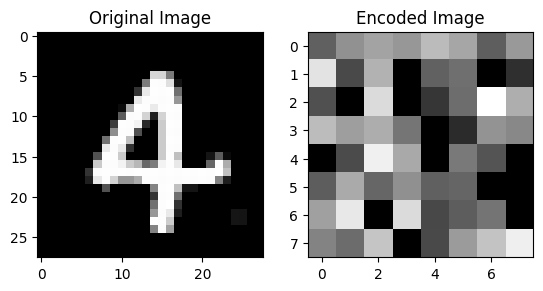

In [46]:
print(f'The digit is {y_test[i]}')
plt.subplot(1,2,1)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(multilayer_encoded_imgs[i].reshape(8,8),cmap='gray')
plt.title('Encoded Image')

In [47]:
multilayer_decoded_imgs = multilayer_decoder.predict(multilayer_encoded_imgs)

313/313 [==============================] - 0s 703us/step


The digit is 4


Text(0.5, 1.0, 'Decoded Image')

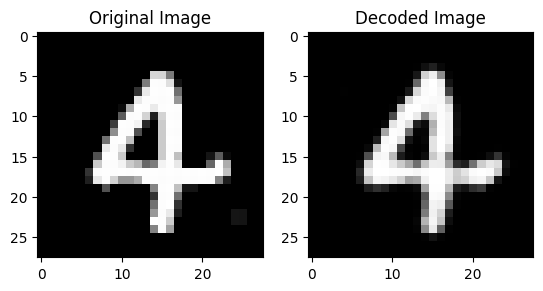

In [48]:
print(f'The digit is {y_test[i]}')
plt.subplot(1,2,1)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(multilayer_decoded_imgs[i].reshape(28,28),cmap='gray')
plt.title('Decoded Image')

In [49]:
multilayer_decoded_img = multilayer_autoencoder.predict(x_test)

313/313 [==============================] - 0s 1ms/step


The digit is 4


Text(0.5, 1.0, 'Autoencoded Image')

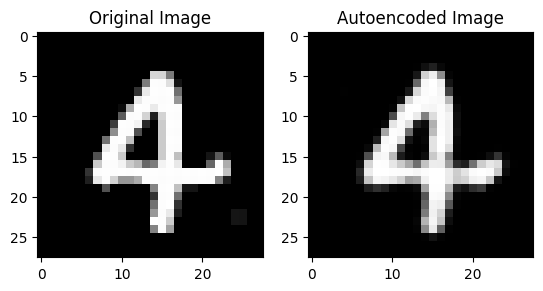

In [50]:
print(f'The digit is {y_test[i]}')
plt.subplot(1,2,1)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(multilayer_decoded_img[i].reshape(28,28),cmap='gray')
plt.title('Autoencoded Image')

## Convolutional Autoencoder

## Create Network

In [61]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [62]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [63]:
x_train = x_train.astype('float64')/255.0
x_test = x_test.astype('float64')/255.0

In [76]:
input_img = Input(shape=(28,28,1))
## encoder
encode_conv_1 = Conv2D(filters=,kernel_size=(3,3),activation="relu",padding="same")(input_img)
encode_pool_1 = MaxPooling2D(pool_size=(2,2),padding="same")(encode_conv_1)
encode_conv_2 = Conv2D(filters=128,kernel_size=(3,3),activation="relu",padding="same")(encode_pool_1)
encode_pool_2 = MaxPooling2D(pool_size=(2,2),padding="same")(encode_conv_2)
encode_conv_3 = Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same")(encode_pool_2)
latent = MaxPooling2D(pool_size=(2,2),padding="same")(encode_conv_3)
## Decoder
decode_conv_1 = Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same")(latent)
decode_pool_1 = UpSampling2D(size=(2,2))(decode_conv_1)
decode_conv_2 = Conv2D(filters=128,kernel_size=(3,3),activation="relu",padding="same")(decode_pool_1)
decode_pool_2 = UpSampling2D(size=(2,2))(decode_conv_2)
decode_conv_3 = Conv2D(filters=256,kernel_size=(3,3),activation="relu")(decode_pool_2)
decode_pool_3 = UpSampling2D(size=(2,2))(decode_conv_3)
output_img = Conv2D(filters=1,kernel_size=(3,3),activation="sigmoid",padding="same")(decode_pool_3)

In [77]:
conv_autoencoder = Model(inputs=input_img,outputs=output_img)

In [78]:
conv_autoencoder.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 256)       2560      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 128)       295040    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 7, 7, 64)          7379

In [79]:
conv_autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [81]:
history_2 = conv_autoencoder.fit(x_train,x_train,batch_size=64,verbose=1,epochs=100,validation_data=(x_test,x_test))

Epoch 1/100
938/938 [==============================] - 28s 29ms/step - loss: 0.6830 - val_loss: 0.6604
Epoch 2/100
938/938 [==============================] - 26s 28ms/step - loss: 0.5483 - val_loss: 0.4729
Epoch 3/100
938/938 [==============================] - 27s 28ms/step - loss: 0.4546 - val_loss: 0.4424
Epoch 4/100
938/938 [==============================] - 27s 29ms/step - loss: 0.4200 - val_loss: 0.3996
Epoch 5/100
938/938 [==============================] - 30s 32ms/step - loss: 0.3632 - val_loss: 0.3294
Epoch 6/100
938/938 [==============================] - 37s 39ms/step - loss: 0.3017 - val_loss: 0.2808
Epoch 7/100
938/938 [==============================] - 35s 37ms/step - loss: 0.2636 - val_loss: 0.2507
Epoch 8/100
938/938 [==============================] - 34s 36ms/step - loss: 0.2413 - val_loss: 0.2345
Epoch 9/100
938/938 [==============================] - 36s 38ms/step - loss: 0.2297 - val_loss: 0.2260
Epoch 10/100
938/938 [==============================] - 37s 40ms/step - l

Epoch 80/100
938/938 [==============================] - 27s 29ms/step - loss: 0.1334 - val_loss: 0.1319
Epoch 81/100
938/938 [==============================] - 27s 29ms/step - loss: 0.1329 - val_loss: 0.1315
Epoch 82/100
938/938 [==============================] - 28s 30ms/step - loss: 0.1325 - val_loss: 0.1311
Epoch 83/100
938/938 [==============================] - 31s 33ms/step - loss: 0.1321 - val_loss: 0.1307
Epoch 84/100
938/938 [==============================] - 31s 33ms/step - loss: 0.1317 - val_loss: 0.1303
Epoch 85/100
938/938 [==============================] - 31s 33ms/step - loss: 0.1313 - val_loss: 0.1299
Epoch 86/100
938/938 [==============================] - 31s 33ms/step - loss: 0.1309 - val_loss: 0.1295
Epoch 87/100
938/938 [==============================] - 36s 38ms/step - loss: 0.1305 - val_loss: 0.1291
Epoch 88/100
938/938 [==============================] - 35s 38ms/step - loss: 0.1302 - val_loss: 0.1288
Epoch 89/100
938/938 [==============================] - 31s 33ms

In [82]:
conv_decoded_img = conv_autoencoder.predict(x_test)

313/313 [==============================] - 2s 7ms/step


The digit is 4


Text(0.5, 1.0, 'Autoencoded Image')

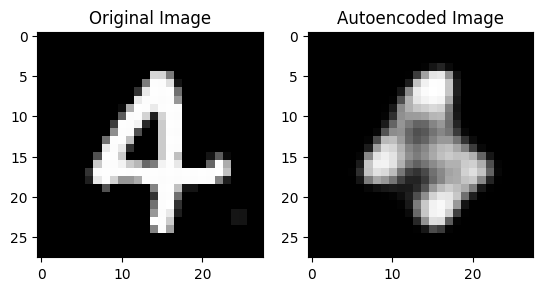

In [83]:
print(f'The digit is {y_test[i]}')
plt.subplot(1,2,1)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(conv_decoded_img[i].reshape(28,28),cmap='gray')
plt.title('Autoencoded Image')